<a href="https://colab.research.google.com/github/ihebbennaceur/c.sec/blob/main/crowdsec-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile

zip_file_path = "/content/drive/MyDrive/vpn-classification.zip"
destination_folder = "/content/"

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("File unzipped successfully.")


File unzipped successfully.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('/content/dataset_v2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  #paths

/content/dataset_v2/shodan_df_hashed.csv
/content/dataset_v2/train.parq
/content/dataset_v2/test.csv
/content/dataset_v2/test.parq
/content/dataset_v2/samples_submissions.csv
/content/dataset_v2/train.csv


In [4]:
df = pd.read_parquet("/content/dataset_v2/train.parq") #load dataset faster than .csv
df.dtypes
df.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0


In [5]:
print("Number of rows : {}".format(df.shape[0])) # number of rows

Number of rows : 61629685


In [6]:
print("Basics statistics: ")
data_desc = df.describe(include='all')
 #we can notice many attacks in the same day (the attack time 61m and unique 2m)
#same for attack type we notice that we have 15 types
#also from first and last 2023-07-30 - 2023-08-29 , the logs for last month only """
display(data_desc)

Basics statistics: 


<ipython-input-6-ab75c11de4cb>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_desc = df.describe(include='all')


,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
count,61629685,61280299,6.162968e+07,61280280,61556024,6.162922e+07,61580173,61629685,6.162968e+07,6.162968e+07,6.162968e+07
unique,2633218,130,NaN,2770,214,NaN,8023,15,NaN,NaN,NaN
top,2023-08-24 03:09:53+00:00,US,NaN,Hetzner Online GmbH,US,NaN,DIGITALOCEAN-ASN,http:spam,NaN,NaN,NaN
freq,738,21625669,NaN,3777486,16749558,NaN,5250039,17301152,NaN,NaN,NaN
first,2023-07-30 00:00:20+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-08-29 12:56:09+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.502061e+04,NaN,NaN,6.294589e+04,NaN,NaN,1.423866e+04,9.618635e+04,1.679770e-02
std,NaN,NaN,1.051660e+05,NaN,NaN,9.666989e+04,NaN,NaN,1.410160e+04,5.762788e+04,1.285128e-01
min,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1.516900e+04,NaN,NaN,1.321300e+04,NaN,NaN,3.300000e+03,4.726100e+04,0.000000e+00


In [7]:
df['attack_type'].value_counts() # as we can see most attack are http spam and scan and exploit , at the end we find db brute force

http:spam               17301152
http:scan               16650038
http:exploit            15307840
ssh:bruteforce           5272603
http:bruteforce          5093495
windows:bruteforce        568503
pop3/imap:bruteforce      440315
tcp:scan                  334948
unknown:unknown           324096
sip:bruteforce            224956
http:crawl                 94977
smb:bruteforce             12437
telnet:bruteforce           2395
ftp:bruteforce              1477
database:bruteforce          453
Name: attack_type, dtype: int64

In [8]:
##the number of labels for each ip
df.groupby("attacker_ip_enum")["label"].max().value_counts()
 #we notice that most of the request are malicous

0    145369
1      2890
Name: label, dtype: int64

In [9]:
#we make .split on ':' to extract first part of attck type and the second type
#we create new data frame attack_type_df and we store the values in 2 columns service for the part 'http,ssh...' and type "spam exploit..."
#we index the new df with attacker ip enum
attack_types_df = (
    df.attack_type.str.split(":", expand=True)
    .rename(columns={0: "service", 1: "type"})
    .set_index(df["attacker_ip_enum"])
)
print(attack_types_df)

                 service        type
attacker_ip_enum                    
6466                http     exploit
6466                http        spam
4637                http  bruteforce
4637                http        spam
4637                http     exploit
...                  ...         ...
190784              http        scan
193446              http        scan
193446              http        spam
193446              http        spam
193446              http        scan

[61629685 rows x 2 columns]


In [10]:
# # dataset = dataset.drop_duplicates()
# # print(dataset.shape)
# #dataset[['category', 'subtype']] = dataset['attack_type'].str.split(':', expand=True)
# top_n = 10
# top_categories = df2['watcher_as_name'].value_counts().nlargest(top_n).index
# df2['watcher_as_name'] = df2['watcher_as_name'].apply(lambda x: x if x in top_categories else 'Other')

In [11]:
# Dropping duplicated service before calling get dummies
one_hot_attack_service_df = pd.get_dummies(  #create new binary columns for each unique value where 1 means present 0 absent (math :base )
    attack_types_df.reset_index() #index on the remainng cols
    .drop_duplicates(subset=["attacker_ip_enum", "service"])
    .set_index("attacker_ip_enum")["service"]
)
display(one_hot_attack_service_df)

,database,ftp,http,pop3/imap,sip,smb,ssh,tcp,telnet,unknown,windows
attacker_ip_enum,,,,,,,,,,,
6466,0,0,1,0,0,0,0,0,0,0,0
4637,0,0,1,0,0,0,0,0,0,0,0
8817,0,0,1,0,0,0,0,0,0,0,0
6251,0,0,1,0,0,0,0,0,0,0,0
5510,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
196904,0,0,0,0,0,0,1,0,0,0,0
199690,0,0,1,0,0,0,0,0,0,0,0
198992,0,0,0,0,0,0,0,0,0,1,0


In [12]:
one_hot_attack_service_df = one_hot_attack_service_df.groupby("attacker_ip_enum").sum()
display(one_hot_attack_service_df)

,database,ftp,http,pop3/imap,sip,smb,ssh,tcp,telnet,unknown,windows
attacker_ip_enum,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199959,0,0,1,0,0,0,0,0,0,0,0
199960,0,0,1,1,0,0,1,0,0,0,0
199961,0,0,1,0,0,0,0,0,0,0,0


In [13]:
# We group by ip_enum and keep only strictly positive values
# to focus on the presence of services rather than their absence
one_hot_attack_service_df = (one_hot_attack_service_df >= 1).astype(int)
display(one_hot_attack_service_df)
display(one_hot_attack_service_df.describe().iloc[0:2,:])

,database,ftp,http,pop3/imap,sip,smb,ssh,tcp,telnet,unknown,windows
attacker_ip_enum,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199959,0,0,1,0,0,0,0,0,0,0,0
199960,0,0,1,1,0,0,1,0,0,0,0
199961,0,0,1,0,0,0,0,0,0,0,0


,database,ftp,http,pop3/imap,sip,smb,ssh,tcp,telnet,unknown,windows
count,148259.000000,148259.000000,148259.000000,148259.000000,148259.000000,148259.000000,148259.000000,148259.00000,148259.000000,148259.000000,148259.000000
mean,0.000998,0.000445,0.944179,0.025172,0.002455,0.002765,0.038716,0.01548,0.001686,0.023216,0.005996


In [14]:
one_hot_attack_types_df = pd.get_dummies(
    attack_types_df["type"],
    # sparse=True
)
one_hot_attack_types_df = one_hot_attack_types_df.groupby("attacker_ip_enum").sum()
# We group by ip_enum and normalized by the number of attack to get a distribyution
#proportion of attacks per ip %
one_hot_attack_types_df = one_hot_attack_types_df / one_hot_attack_types_df.sum(
    1  # some for each cols
).values.reshape(-1, 1) # series bcs of .values  , reshape to make it with 2 dimensions
one_hot_attack_types_df.head(10)

,bruteforce,crawl,exploit,scan,spam,unknown
attacker_ip_enum,,,,,,
0,0.000000,0.0,0.000000,0.500000,0.500000,0.0
1,0.266667,0.0,0.466667,0.033333,0.233333,0.0
2,0.000000,0.0,0.000000,0.931034,0.068966,0.0
3,0.080000,0.0,0.600000,0.040000,0.280000,0.0
4,0.235294,0.0,0.455882,0.058824,0.250000,0.0
6,0.000000,0.0,0.021739,0.847826,0.130435,0.0
8,0.235294,0.0,0.470588,0.058824,0.235294,0.0
9,0.250000,0.0,0.500000,0.000000,0.250000,0.0
11,0.006250,0.0,0.006250,0.793750,0.193750,0.0


In [15]:
REFERENCE_PORTS = set(("22", "80", "443", "7777"))
#  the port information is collected on a per-attacker basis we only have one row per attacker IP, so we don't need to use pd.groupby()
def extract_port_numbers(value: dict):
    return set(key.split("/")[0] for key in value.keys())


shodan_df = pd.read_csv(
    "/content/dataset_v2/shodan_df_hashed.csv",
    dtype={"attacker_ip_enum": "int32"},
    index_col="attacker_ip_enum",
)
display(shodan_df)

,shodan_info
attacker_ip_enum,
5915,{}
3325,"{'22/tcp': {'headers_hash': None, 'jarm': None..."
8416,{}
1213,{}
9185,{}
...,...
196812,"{'1701/udp': {'headers_hash': None, 'jarm': No..."
191141,{}
195077,"{'80/tcp': {'headers_hash': -282574487, 'jarm'..."


In [16]:
import ast
shodan_df["shodan_info"] = shodan_df["shodan_info"].map(ast.literal_eval)
shodan_df["shodan_open_ports"] = shodan_df["shodan_info"].map(extract_port_numbers)

In [17]:
open_ports_count = shodan_df["shodan_open_ports"].map(len).rename("open_ports_count")

In [18]:
# We select the reference port by doing a set intersection
reference_ports_df = shodan_df["shodan_open_ports"].map(lambda x: REFERENCE_PORTS & x)

one_hot_reference_ports_df = pd.get_dummies(reference_ports_df.explode(), prefix="port")
# Aggregate the dummies by IP
one_hot_reference_ports_df = one_hot_reference_ports_df.groupby(
    "attacker_ip_enum"
).sum()
# Final feature for port: count and one hot table of reference port
ports_features_df = pd.concat([one_hot_reference_ports_df, open_ports_count], axis=1)
# Checking results
ports_features_df[(ports_features_df > 0).any(axis=1)].head()

,port_22,port_443,port_7777,port_80,open_ports_count
attacker_ip_enum,,,,,
5,0,0,0,1,2
7,1,1,0,1,6
13,0,0,0,1,6
18,1,0,0,0,1
24,0,1,0,1,15


In [19]:
# We create a df label df which contains one row per attacker IP
label_df = df.drop_duplicates(["attacker_ip_enum", "label"]).set_index(
    "attacker_ip_enum"
)["label"]

dataset = pd.concat(
    [
        one_hot_attack_types_df,
        one_hot_attack_service_df,
        ports_features_df,
        label_df,
    ],
    axis=1,
    join="inner",
)

In [20]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "label"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
attacker_ip_enum
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int8

X :
                  bruteforce  crawl   exploit      scan      spam  unknown  \
attacker_ip_enum                                                             
0                   0.000000    0.0  0.000000  0.500000  0.500000      0.0   
1                   0.266667    0.0  0.466667  0.033333  0.233333      0.0   
2                   0.000000    0.0  0.000000  0.931034  0.068966      0.0   
3                   0.080000    0.0  0.600000  0.040000  0.280000      0.0   
4                   0.235294    0.0  0.455882  0.058824  0.250000      0.0   

                  database  ftp  http  pop3/imap  ...  ssh  tcp  telnet  \
attacker_ip_enum                                  ...                     
0                        0    0     1          0  ...    0    0       0   
1                        0    0     1          0  ...    0    0       0   
2                    

# **test %**

In [21]:
print(sum(Y)/len(Y))

0.019492914426780163


In [27]:
from sklearn.model_selection import train_test_split

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,stratify=Y)

Dividing into train and test sets...


# **Test ytrain y test**

In [28]:
print(sum(Y_train)/len(Y_train),sum(Y_test)/len(Y_test)) #equilibré

0.01949297077499735 0.0194927829488736


In [29]:
from sklearn.preprocessing import StandardScaler
#normalize , we have only no need onehotencoding
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
modelindex=[]
f1_Train=[]
f1_Test=[]

# **Decision Tree**

# ***Round1***

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from graphviz import Source
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [8, 10],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [4, 8]
}
gridsearchdecisiontree = GridSearchCV(classifier, param_grid = params,scoring='f1', cv = 3) # cv : the number of folds to be used for CV
gridsearchdecisiontree.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearchdecisiontree.best_params_)
print("Best validation f1 score train : ", gridsearchdecisiontree.best_score_)

decisiontreetrain=gridsearchdecisiontree.best_score_

y_pred = gridsearchdecisiontree.predict(X_test)
print(' the f1 score on test: ')
decisiontreetest=f1_score(y_pred=y_pred, y_true=Y_test)
print(decisiontreetest)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best validation f1 score train :  0.5350009470664132
 the f1 score on test: 
0.5567567567567567


In [33]:
modelindex.append('gridsearchdecisiontree')
f1_Train.append(decisiontreetrain)
f1_Test.append(decisiontreetest)

In [34]:
print(modelindex,f1_Train,f1_Test)

['gridsearchdecisiontree'] [0.5350009470664132] [0.5567567567567567]


In [35]:
import joblib
joblib.dump(gridsearchdecisiontree, 'gridsearchdecisiontree_model.pkl')

['gridsearchdecisiontree_model.pkl']

# **ROund2**

In [36]:
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [10, 20, 40],
    'min_samples_leaf': [2],
    'min_samples_split': [4]
}
dectreeround2 = GridSearchCV(classifier, param_grid=params, scoring='f1', cv=3)
dectreeround2.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters: ", dectreeround2.best_params_)
print("Best validation f1 score on the train set: ", dectreeround2.best_score_)

dectreeround2train = dectreeround2.best_score_

y_pred = dectreeround2.predict(X_test)
print('The f1 score on test:')
dectreeround2test = f1_score(y_pred=y_pred, y_true=Y_test)
print(dectreeround2test)


modelindex.append('dectreeround2')
f1_Train.append(dectreeround2train)
f1_Test.append(dectreeround2test)

joblib.dump(dectreeround2, 'dectreeround2_model.pkl')


...Done.
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best validation f1 score on the train set:  0.5298784979118589
The f1 score on test:
0.5608607935440484


['dectreeround2_model.pkl']

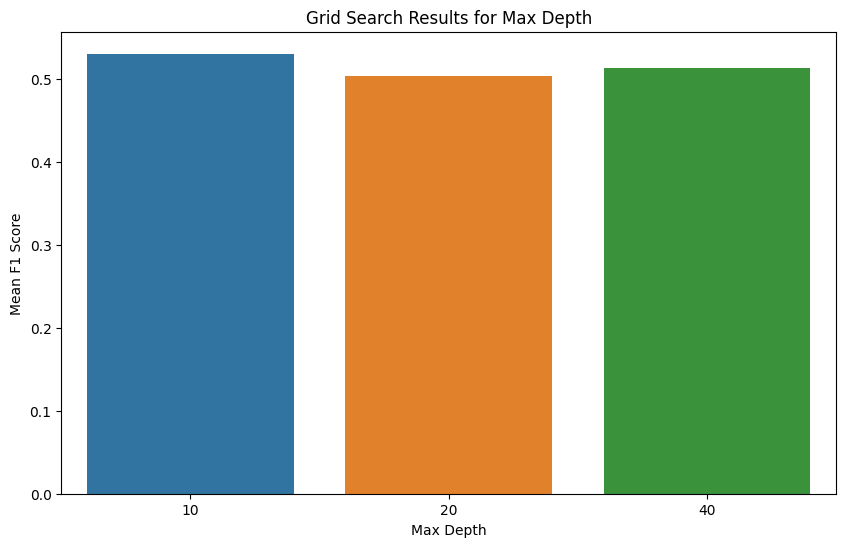

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Access the results from the grid search
results = dectreeround2.cv_results_

# Extract the hyperparameters and corresponding scores
max_depth_values = results['param_max_depth']
f1_scores = results['mean_test_score']

# Convert max_depth to integers (if necessary)
max_depth_values = [int(val) for val in max_depth_values]

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=max_depth_values, y=f1_scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean F1 Score')
plt.title('Grid Search Results for Max Depth')
plt.show()


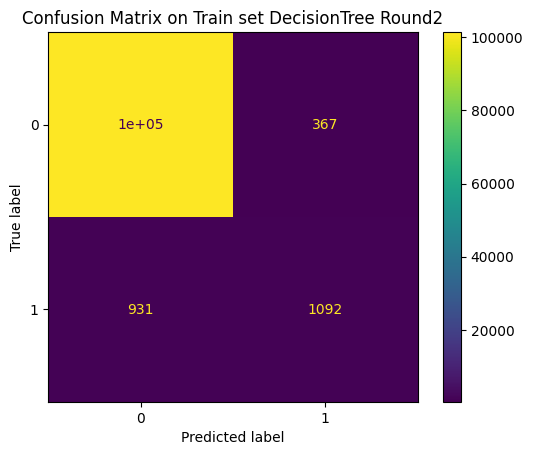

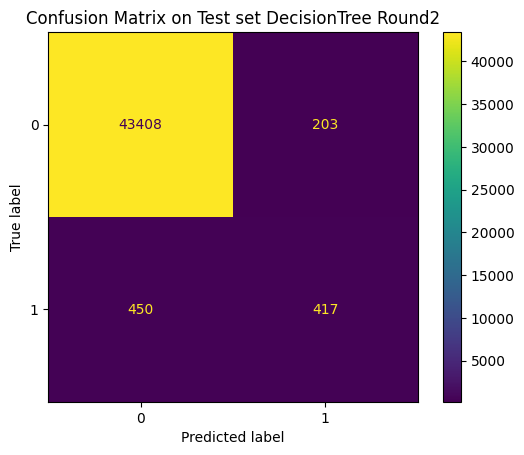

In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# [True negative ,False positive ]
# [False negative ,True positive ]
from sklearn.metrics import ConfusionMatrixDisplay
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set DecisionTree Round2") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dectreeround2, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set DecisionTree Round2") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dectreeround2, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

# **decision tree ==> Bagging**
taking a majority vote among the base models

In [37]:
from sklearn.ensemble import BaggingClassifier
# Create and fit the BaggingClassifier
bagging = BaggingClassifier(base_estimator=dectreeround2, n_estimators=40)
bagging.fit(X_train, Y_train)

# Predict on the training and test data
y_train_pred = bagging.predict(X_train)
y_test_pred = bagging.predict(X_test)

# Calculate F1 score for the training and test data
bagging_train_f1 = f1_score(y_true=Y_train, y_pred=y_train_pred)
bagging_test_f1 = f1_score(y_true=Y_test, y_pred=y_test_pred)

# Print the F1 scores
print('F1 score on training data:', bagging_train_f1)
print('F1 score on test data:', bagging_test_f1)

# Append the results to your lists
modelindex.append('Bagging')
f1_Train.append(bagging_train_f1)
f1_Test.append(bagging_test_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


F1 score on training data: 0.8742189622385221
F1 score on test data: 0.616699539776463


In [41]:
joblib.dump(bagging, 'bagging_decisiontree_model.pkl')

['bagging_decisiontree_model.pkl']

# **randomforest**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5], #the min number of sample in each leaf
    'min_samples_split': [2, 8], #min number of samples to split a node
    'n_estimators': [10, 20, 40, 60,] #number or tree in the rforest
}
gridsearch = GridSearchCV(classifier, param_grid = params,scoring='f1', cv = 3) # metrics = f1 , 3 flods for gridsearch
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation score f1 : ", gridsearch.best_score_) #f1 score

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best validation score f1 :  0.49719545423867073


F1 scores

In [59]:
rdforesttrain=gridsearch.best_score_
rdforest=gridsearch
y_pred = rdforest.predict(X_test)
print('here is the f1 on test: ')
rdforesttest=f1_score(y_pred=y_pred, y_true=Y_test)
print(rdforesttest)


here is the f1 on test: 
0.45264847512038514


In [60]:
modelindex.append('rdforest')
f1_Train.append(rdforesttrain)
f1_Test.append(rdforesttest)
print(modelindex,f1_Train,f1_Test)

['gridsearchdecisiontree', 'dectreeround2', 'Bagging', 'rdforest'] [0.5350009470664132, 0.5298784979118589, 0.8742189622385221, 0.49719545423867073] [0.5567567567567567, 0.5608607935440484, 0.616699539776463, 0.45264847512038514]


In [61]:
joblib.dump(rdforest, 'rdforest_model.pkl')

['rdforest_model.pkl']

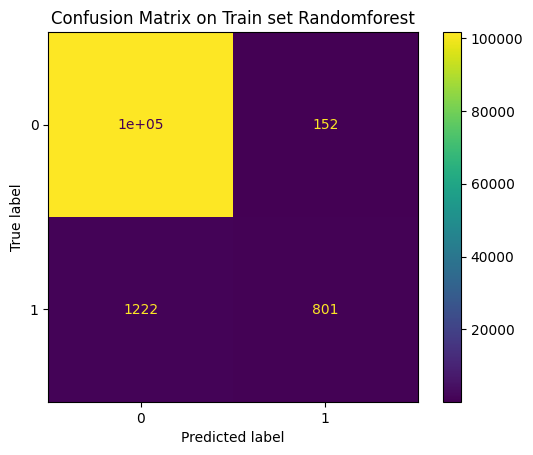

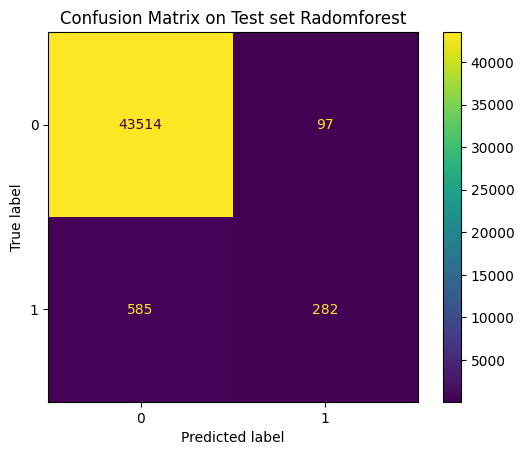

In [68]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# [True negative ,False positive ]
# [False negative ,True positive ]
from sklearn.metrics import ConfusionMatrixDisplay
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set Randomforest") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rdforest, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set Radomforest") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rdforest, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

# **XGBOOST**

In [63]:
from xgboost import XGBClassifier

print("Grid search for XGBoost...")
xgboost = XGBClassifier()

params = {
    'max_depth': [10],
    'min_child_weight': [1, 2, 4, 5, 6, 8],
    'n_estimators': [40]
}

gridsearch_xgboost = GridSearchCV(xgboost, param_grid=params, cv=10, verbose=1, n_jobs=-1)
gridsearch_xgboost.fit(X_train, Y_train)

best_xgboost_model = gridsearch_xgboost.best_estimator_

y_train_pred = best_xgboost_model.predict(X_train)
y_test_pred = best_xgboost_model.predict(X_test)

xgboost_train_f1 = f1_score(y_true=Y_train, y_pred=y_train_pred)
xgboost_test_f1 = f1_score(y_true=Y_test, y_pred=y_test_pred)

print('F1 score on training data:', xgboost_train_f1)
print('F1 score on test data:', xgboost_test_f1)

# Save the XGBoost model
joblib.dump(best_xgboost_model, 'xgboost_model.pkl')

Grid search for XGBoost...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
F1 score on training data: 0.8005524861878451
F1 score on test data: 0.6012186865267434


['xgboost_model.pkl']

In [64]:
modelindex.append('best_xgboost_model')
f1_Train.append(xgboost_train_f1)
f1_Test.append(xgboost_test_f1)
print(modelindex)
print(f1_Train)
print(f1_Test)


['gridsearchdecisiontree', 'dectreeround2', 'Bagging', 'rdforest', 'best_xgboost_model']
[0.5350009470664132, 0.5298784979118589, 0.8742189622385221, 0.49719545423867073, 0.8005524861878451]
[0.5567567567567567, 0.5608607935440484, 0.616699539776463, 0.45264847512038514, 0.6012186865267434]


# the previous xgb overfit time for **regularization**

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Define the grid of values to be tested
params = {
    'max_depth': [5, 10],  # lvl of tree (complexity)
    'min_child_weight': [1, 2, 4, 6],  # Minimum sum of instance weight  needed in a child
    'n_estimators': [40, 60],  # trees
    'gamma': [0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'alpha': [0.1, 0.2, 0.3],  # L1 regularization term (lasso)
    'seed': [42],  # for reproducibility
    'subsample': [0.9],  # everytime we take 90% of the data
    'colsample_bytree': [0.5]  # 50% features used for training each tree
}

# Create an XGBoost classifier with the seed parameter
xgboost = XGBClassifier(seed=42)

# Grid search with cross-validation
gridsearch_xgboost = GridSearchCV(xgboost, param_grid=params, cv=10, verbose=1, n_jobs=-1, scoring='f1')
gridsearch_xgboost.fit(X_train, Y_train)

# Get the optimized hyperparameters
xgb2 = gridsearch_xgboost.best_estimator_

y_train_pred = xgb2.predict(X_train)
y_test_pred = xgb2.predict(X_test)

xgb2_train_f1 = f1_score(y_true=Y_train, y_pred=y_train_pred)
xgb2_test_f1 = f1_score(y_true=Y_test, y_pred=y_test_pred)

print('F1 score on training data:', xgb2_train_f1)
print('F1 score on test data:', xgb2_test_f1)

modelindex.append('xgb2')
f1_Train.append(xgb2_train_f1)
f1_Test.append(xgb2_test_f1)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
F1 score on training data: 0.7887559142777623
F1 score on test data: 0.588791357191087


In [66]:
joblib.dump(xgb2, 'xgb2_model.pkl')

['xgb2_model.pkl']

<Figure size 1200x800 with 0 Axes>

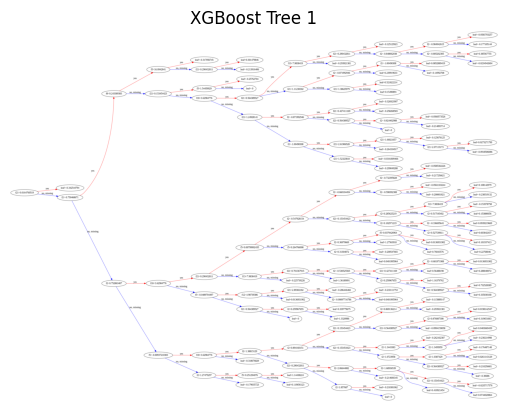

<Figure size 1200x800 with 0 Axes>

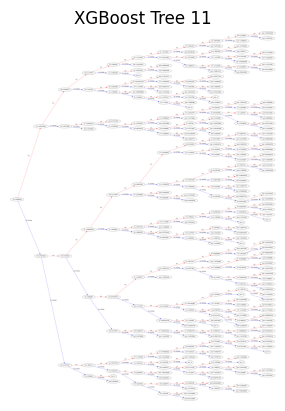

<Figure size 1200x800 with 0 Axes>

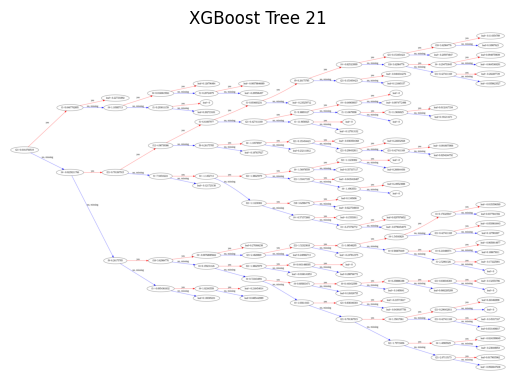

<Figure size 1200x800 with 0 Axes>

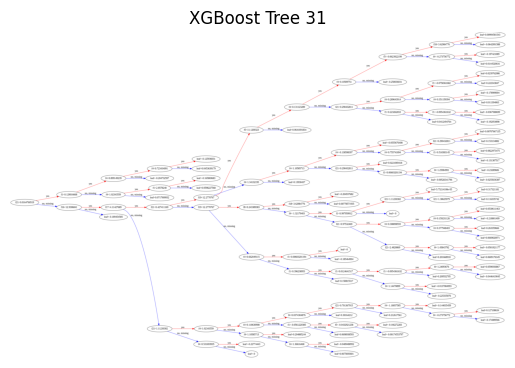

<Figure size 1200x800 with 0 Axes>

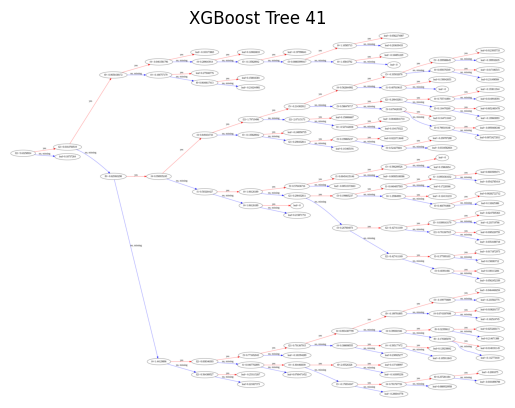

<Figure size 1200x800 with 0 Axes>

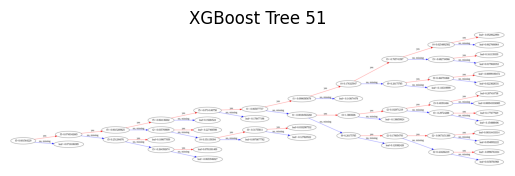

In [67]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Plot the XGBoost model's trees
for i in range(0, xgb2.get_params()['n_estimators'], 10):  # Adjust the step size as needed
    plt.figure(figsize=(12, 8))
    plot_tree(xgb2, num_trees=i, rankdir='LR')  # Adjust rankdir as needed
    plt.title(f"XGBoost Tree {i + 1}")
    plt.show()


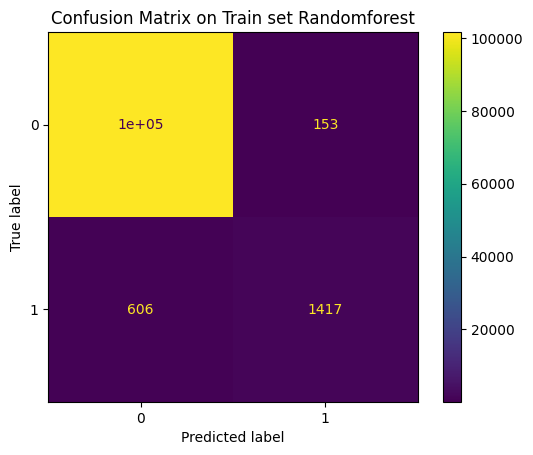

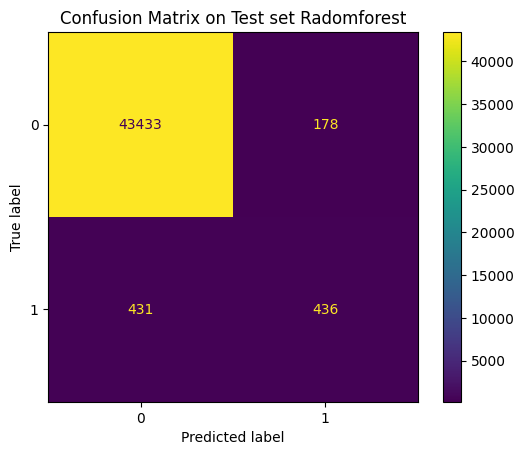

In [80]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# [True negative ,False positive ]
# [False negative ,True positive ]
from sklearn.metrics import ConfusionMatrixDisplay
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set Randomforest") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb2, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set Radomforest") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb2, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [81]:
score_table = pd.DataFrame({'Model': modelindex, 'F1 Score (Train)': f1_Train, 'F1 Score (Test)': f1_Test})
display(score_table)

,Model,F1 Score (Train),F1 Score (Test)
0,gridsearchdecisiontree,0.535001,0.556757
1,dectreeround2,0.529878,0.560861
2,Bagging,0.874219,0.616700
3,rdforest,0.497195,0.452648
4,best_xgboost_model,0.800552,0.601219
5,xgb2,0.788756,0.588791


# **SUbmission test**

In [ ]:
df = pd.read_parquet("/content/dataset_v2/test.parq")
df.head()

attack_types_df = (
    df.attack_type.str.split(":", expand=True)
    .rename(columns={0: "service", 1: "type"})
    .set_index(df["attacker_ip_enum"])
)

one_hot_attack_service_df = pd.get_dummies(
    # Dropping duplicated service before calling get dummies
    attack_types_df.reset_index()
    .drop_duplicates(subset=["attacker_ip_enum", "service"])
    .set_index("attacker_ip_enum")["service"]
    # ,sparse=True
)
one_hot_attack_service_df = one_hot_attack_service_df.groupby("attacker_ip_enum").sum()
one_hot_attack_service_df = (one_hot_attack_service_df >= 1).astype(int)

one_hot_attack_types_df = pd.get_dummies(
    attack_types_df["type"],
    # sparse=True
)
one_hot_attack_types_df = one_hot_attack_types_df.groupby("attacker_ip_enum").sum()
# We group by ip_enum and normalized by the number of attack to get a distribyution
one_hot_attack_types_df = one_hot_attack_types_df / one_hot_attack_types_df.sum(
    1
).values.reshape(-1, 1)

X_val_df = pd.concat(
    [
                one_hot_attack_types_df,
        one_hot_attack_service_df,
        ports_features_df,
    ],
    axis=1,
    join="inner",
)

In [ ]:
display(X_val_df)

,bruteforce,crawl,exploit,scan,spam,unknown,database,ftp,http,pop3/imap,...,ssh,tcp,telnet,unknown,windows,port_22,port_443,port_7777,port_80,open_ports_count
attacker_ip_enum,,,,,,,,,,,,,,,,,,,,,
5,0.284848,0.0,0.321212,0.060606,0.333333,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2
7,0.990000,0.0,0.000000,0.010000,0.000000,0.0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,6
21,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29,0.187500,0.0,0.437500,0.062500,0.312500,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
33,0.000000,0.0,0.000000,0.500000,0.500000,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199947,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
199949,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
199962,0.058824,0.0,0.019608,0.470588,0.450980,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
X_val = sc.transform(X_val_df)

In [ ]:
prediction = pd.Series(joblib.load('/content/xgb2_model.pkl').predict(X_val), index=X_val_df.index).rename("prediction")
prediction.to_csv("xb2.csv")